<a href="https://colab.research.google.com/github/MaetrixTraey/code-unza25-csc4792-project_team_6-repository-for-Project-Team-6/blob/main/code_unza25_csc4792_project_team_6_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phase 1: Business Understanding

---


## Problem Statement
The English Wikipedia article for Zambia lacks several standard sections found in well-developed country pages, such as Infrastructure, Transportation, Environment, detailed Health Care, and expanded Culture. This reduces the completeness and utility of the page. Our project aims to systematically detect these missing or underdeveloped sections through structured, data-driven analysis.

## 1.1 Business Objectives
Our goal is to identify content gaps in the Zambia Wikipedia page to:
- Help Wikipedia editors prioritize content improvements.
- Provide educators and researchers with a quick reference for missing topics.
- Develop a repeatable method for assessing completeness in other country pages.

Success means delivering an evidence-based list of missing or underdeveloped sections, verified against a benchmark set of complete country pages.

**Desired Outcome:**  
A report and visualizations showing completeness scores per page and a ranked list of the most frequently missing sections.

**Business Success Criteria:**
- Stakeholders (editors, researchers) can use the output to prioritize editing efforts.
- Increased representation of Zambia on Wikipedia within 3–6 months after insights are shared.
- More comprehensive pages that enhance public knowledge about Zambia.

---

**Stakeholders:**
- Wikipedia editors (especially Zambian contributors)
- Students and researchers
- Educational institutions
- General public

**Desired Outcome:**  
A report and visualizations showing completeness scores per page and a ranked list of the most frequently missing sections.

**Business Success Criteria (Real-world):**
- Stakeholders (editors, researchers) can use the output to prioritize editing efforts.
- Increased representation of Zambia on Wikipedia within 3–6 months after insights are shared.
- More comprehensive pages that enhance public knowledge about Zambia.

---

## 1.2 Assess Situation

**Resources:**
- Wikipedia API for content retrieval
- Python environment (Google Colab/Jupyter Notebook)
- Libraries: `wikipedia-api`, `pandas`, `matplotlib`, `seaborn`
- Team members with skills in programming, data processing, and visualization

**Constraints:**
- Analysis is limited to structure, not factual accuracy
- Wikipedia content changes frequently, affecting reproducibility

**Risks:**
- API rate limits or downtime
- Variation in page structures
- Possible mismatch between our template and Wikipedia editorial norms

**Assumptions:**
- Selected standard template reflects an ideal structure for general topic pages
- Wikipedia API will remain stable during the project timeline

---

## 1.3 Determine Data Mining Goals

**Overall Data Mining Objective:**
Translate the business objective of improving Zambia’s Wikipedia representation into a technical process that measures completeness.

**Specific Data Mining Goals:**
1. Extract section headings from selected Zambia-related Wikipedia pages using the Wikipedia API.
2. Pre-process and normalize section titles for accurate comparison.
3. Compare the extracted structure against a predefined standard section template.
4. Calculate a completeness score for each page.
5. Identify and rank the most frequently missing sections across all pages.

**Data Mining Success Criteria (Technical):**
- 80% accuracy in detecting section presence/absence compared to manual verification for at least 2 sample pages.
- Completeness scores computed without data loss or parsing errors.
- Identification of at least 3 consistently missing sections across all pages.


---

## 1.4 Produce Project Plan

**High-Level Timeline & Phases:**

### High-Level Timeline & Phases

| **Phase**    | **Description** | **Deliverable** |
|--------------|-----------------|-----------------|
| **1. Business Understanding** | Define problem, goals, and success criteria | BU section in Notebook + `README.md` |
| **2. Data Understanding** | Explore data from 1–2 sample pages, check section structure | Sample raw data, API test results |
| **3. Data Preparation** | Clean, normalize, and structure data for scoring | Preprocessed data CSV |
| **4. Modelling** | Implement completeness scoring algorithm | Scoring function, results table |
| **5. Evaluation** | Verify accuracy by manual inspection of sample pages | Validation notes |
| **6. Deployment** | Finalize report, visualizations, and presentation | ACM report, slides, GitHub repo |


**Initial Assessment of Tools and Techniques**

- **Data Collection**:  
  - Wikipedia API  

- **Text Processing**:  
  - Natural Language Processing libraries

- **Analysis**:  
  - Python pandas  
  - scikit-learn for classification  

- **Visualization**:  
  - matplotlib  
  - seaborn for presenting findings  

- **Version Control**:  
  - GitHub with tagged commits

---

## 1.5 Cost And Benefit Analysis

**Costs:**
- Time investment in coding, testing, and documentation.
- Limited API calls if rate-limiting occurs (minor for our dataset size).

**Benefits:**
- Provides actionable insights to improve Zambia’s online representation.
- Lightweight, reproducible method for other countries or topics.
- Can be automated to run periodically for continuous monitoring.




---
# Phase 2: Data Understanding
---
## Objective
The objective of this phase is to perform an initial exploration of our dataset(s).  
We aim to:
- Get a "feel" for the data,
- Identify its main characteristics,
- Spot potential quality issues,
- Prepare for data cleaning and transformation in the next phase.

---

# 2.1. Initial Data Collection

In [ ]:
!pip install wikipedia-api

import wikipediaapi
import pandas as pd

#wikipedia api initialisation
wiki_wiki = wikipediaapi.Wikipedia(
    language='en',
    user_agent="CRISPDM-DataUnderstanding/1.0"
)



### Interpretation of Above Cell
- Installs the Wikipedia API library.  
- Imports Wikipedia API and pandas.  
- Initializes a Wikipedia API object in English with a custom user agent.  


In [ ]:
# Function to recursively extract sections from a Wikipedia page
def get_sections(page, depth=0):
    sections = []
    for s in page.sections:
        sections.append({
            "title": s.title.strip(),
            "depth": depth + 1
        })
        sections.extend(get_sections(s, depth + 1))
    return sections

#  pages: Zambian province pages
pages = ["Southern Province, Zambia", "Copperbelt Province, Zambia", "Lusaka Province, Zambia", "Eastern Province, Zambia", "Northern Province, Zambia", "Western Province, Zambia", "North-Western Province, Zambia", "Muchinga Province, Zambia", "Central Province, Zambia", "Luapula Province, Zambia"]

data = []
for province in pages:
    page = wiki_wiki.page(province)
    if page.exists():
        sections = get_sections(page)
        for sec in sections:
            data.append({
                "province": province,
                "Section": sec["title"],
                "Depth": sec["depth"]
            })
    else:
        print(f"Page {province} not found!")

# Convert to DataFrame
df = pd.DataFrame(data)
df.to_csv("zambian_provinces_wikipedia.csv", index=False)

df.head(10)


,province,Section,Depth
0,"Southern Province, Zambia",Geography,1
1,"Southern Province, Zambia",Demographics,1
2,"Southern Province, Zambia",Economy and agriculture,1
3,"Southern Province, Zambia","Education, employment, and health",1
4,"Southern Province, Zambia",National parks and culture,1
5,"Southern Province, Zambia",Administration,1
6,"Southern Province, Zambia",See also,1
7,"Southern Province, Zambia",Citations,1
8,"Southern Province, Zambia",General and cited references,1
9,"Copperbelt Province, Zambia",Demographics,1


# Interpretation of Above cell
- Defines a function to extract all sections (with hierarchy levels) from a Wikipedia page.  
- Collects sections from Wikipedia pages of Zambian provinces.  
- Stores the extracted data (province, section title, depth) in a list.  
- Converts the list into a DataFrame and saves it as a CSV file.  
- Displays the first 20 rows of the DataFrame. ##


# 2.2. Data Description

In [ ]:
# Describing Data
print("Shape of dataset:", df.shape)

print("\nInfo:")
print(df.info())

print("\nDescribe (numeric columns):")
print(df.describe())

print("\nFirst 10 rows:")
print(df.head(10))

print("\nUnique provinces:", df['province'].nunique())
print("Unique sections:", df['Section'].nunique())


Shape of dataset: (97, 3)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   province  97 non-null     object
 1   Section   97 non-null     object
 2   Depth     97 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 2.4+ KB
None

Describe (numeric columns):
           Depth
count  97.000000
mean    1.072165
std     0.260105
min     1.000000
25%     1.000000
50%     1.000000
75%     1.000000
max     2.000000

First 10 rows:
                      province                            Section  Depth
0    Southern Province, Zambia                          Geography      1
1    Southern Province, Zambia                       Demographics      1
2    Southern Province, Zambia            Economy and agriculture      1
3    Southern Province, Zambia  Education, employment, and health      1
4    Southern Province, Zambia         National parks and

### Interpretation of the above cell
- Checks the dataset’s shape (rows and columns).  
- Prints dataset information (column types and non-null counts).  
- Shows descriptive statistics for numeric columns.  
- Displays the first 10 rows.  
- Counts unique provinces and unique sections.  


# 2.3. Data Exploration

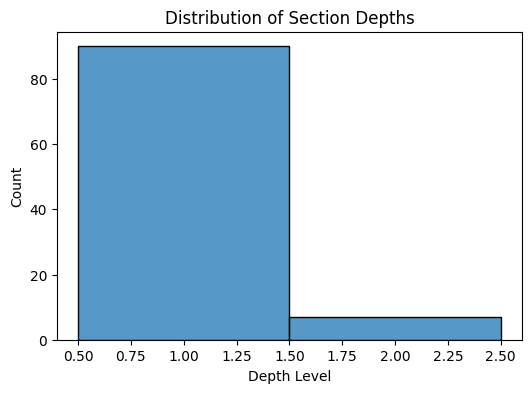

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of section depth
plt.figure(figsize=(6,4))
sns.histplot(df['Depth'], bins=range(1, df['Depth'].max()+2), discrete=True)
plt.title("Distribution of Section Depths")
plt.xlabel("Depth Level")
plt.ylabel("Count")
plt.show()


### Interpretation of histogram
- Imports Matplotlib and Seaborn for visualization.  
- Plots a histogram showing how section depths are distributed across the dataset.  


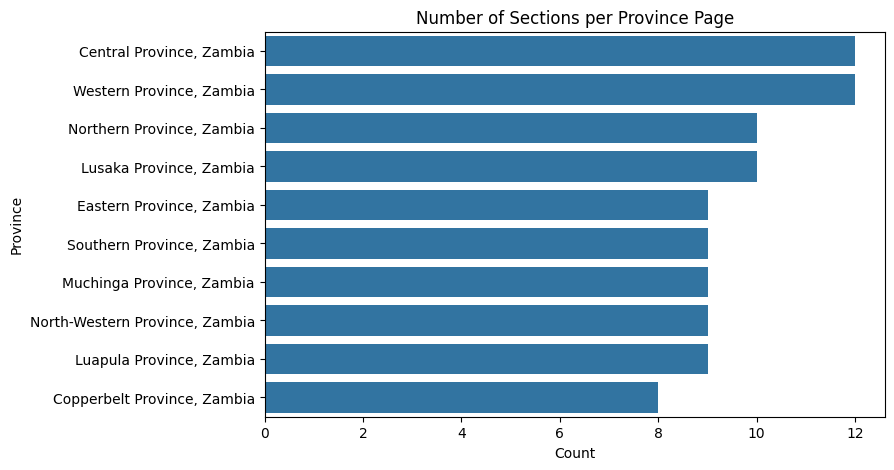

In [ ]:
# Number of sections per province
plt.figure(figsize=(8,5))
sns.countplot(y="province", data=df, order=df['province'].value_counts().index)
plt.title("Number of Sections per Province Page")
plt.xlabel("Count")
plt.ylabel("Province")
plt.show()


### Interpretation of Bar chart
- The horizontal bar chart shows the number of sections for each Zambian province page.  


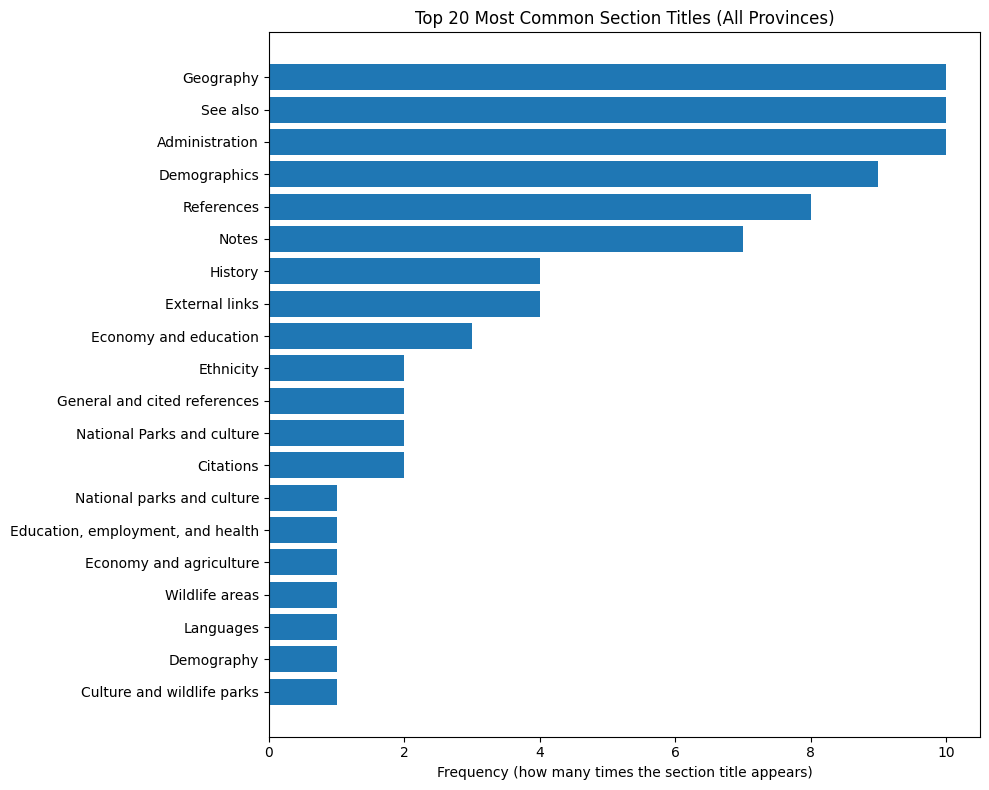

In [ ]:
top_n = 20
top_sections = df['Section'].value_counts().head(top_n)
fig, ax = plt.subplots(figsize=(10, max(4, 0.4*len(top_sections))))
ax.barh(top_sections.index[::-1], top_sections.values[::-1])  # reverse for descending
ax.set_xlabel("Frequency (how many times the section title appears)")
ax.set_title(f"Top {top_n} Most Common Section Titles (All Provinces)")
plt.tight_layout()
plt.show()

### Interpretation
- Identifies the 20 most frequent section titles across all provinces.  
- A horizontal bar chart showing their frequencies.

# 2.4. Verification of Data Quality

In [ ]:
import numpy as np

# List of provinces
provinces = sorted(df['province'].unique())
n_provinces = len(provinces)

# Map province to the set of sections
prov_to_sections = df.groupby('province')['Section'].apply(lambda s: set(s.str.strip())).to_dict()

# common sections threshold(used 60% of provinces)
threshold_pct = 0.6
min_prov = max(1, int(np.ceil(threshold_pct * n_provinces)))
section_counts = df['Section'].value_counts()
common_sections = section_counts[section_counts >= min_prov].index.tolist()

# Build missing-section report
dq_sections_report = []
for p in provinces:
    present = prov_to_sections.get(p, set())
    missing = [s for s in common_sections if s not in present]
    dq_sections_report.append({
        'Province': p,
        'Total Common Sections': len(common_sections),
        'Present Sections': len(common_sections) - len(missing),
        'Missing Sections': len(missing),
        'Missing Section Titles': missing
    })

# Convert to DataFrame and sort by number of missing sections
dq_sections_df = pd.DataFrame(dq_sections_report).sort_values('Missing Sections', ascending=False)

dq_sections_df.to_csv("zambian_provinces_data_quality_report.csv", index=False)
dq_sections_df


,Province,Total Common Sections,Present Sections,Missing Sections,Missing Section Titles
0,"Central Province, Zambia",6,4,2,"[References, Notes]"
8,"Southern Province, Zambia",6,4,2,"[References, Notes]"
1,"Copperbelt Province, Zambia",6,5,1,[Notes]
4,"Lusaka Province, Zambia",6,5,1,[Demographics]
3,"Luapula Province, Zambia",6,6,0,[]
2,"Eastern Province, Zambia",6,6,0,[]
5,"Muchinga Province, Zambia",6,6,0,[]
6,"North-Western Province, Zambia",6,6,0,[]
7,"Northern Province, Zambia",6,6,0,[]
9,"Western Province, Zambia",6,6,0,[]


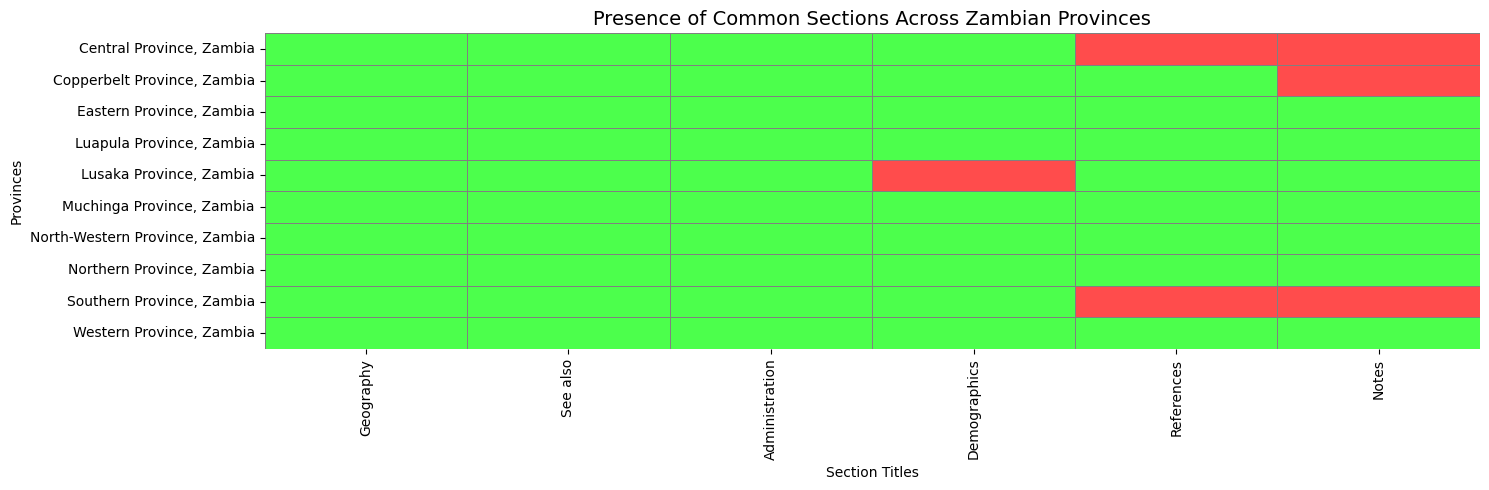

In [ ]:
# matrix: provinces x common sections, 1 = present, 0 = missing
common_sections = section_counts[section_counts >= min_prov].index.tolist()
heatmap_data = pd.DataFrame(index=provinces, columns=common_sections)

for p in provinces:
    present_sections = prov_to_sections.get(p, set())
    for sec in common_sections:
        heatmap_data.loc[p, sec] = 1 if sec in present_sections else 0

# numeric conversion
heatmap_data = heatmap_data.astype(int)

#color palette: red = missing (0), green = present (1)
cmap = sns.color_palette(["#FF4C4C", "#4CFF4C"])

# binary heatmap
plt.figure(figsize=(15, max(5, 0.3*len(provinces))))
sns.heatmap(
    heatmap_data,
    cmap=cmap,
    cbar=False,
    linewidths=0.5,
    linecolor='gray',
    square=False
)
plt.title("Presence of Common Sections Across Zambian Provinces", fontsize=14)
plt.xlabel("Section Titles")
plt.ylabel("Provinces")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


##2.5. Summary of Initial Findings

In our initial analysis, we loaded a dataset containing all the Wikipedia pages about the provinces in Zambia. Upon describing the data, we observed the following:

- **Depth of Pages:** Most Wikipedia pages on the provinces had a depth of 2, indicating that sub-sections were limited.
- **Section Naming Variability:** Some sections had different naming conventions across pages, which may appear as anomalies in the analysis.
- **Number of Sections by Province:**
  - **Central Province:** 12 sections (most sections in the dataset)
  - **Western Province:** 12 sections
  - **Copperbelt Province:** 8 sections (least sections in the dataset)
- **Missing Sections:** The quality report noted that Central and Southern Provinces had the most missing common sections (2 missing sections each), which is an anomaly considering that Central Province has the highest number of sections in the dataset.


---
#3. Data Preparation
---

##Installation of wikipedia-api and mwparserfromhell

In [1]:
!pip install wikipedia-api
!pip install mwparserfromhell

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia-api: filename=Wikipedia_API-0.8.1-py3-none-any.whl size=15383 sha256=5ee94ef93aa408b491b94a3d954d780d49478f2bca9764718ebdafcf6976ed60
  Stored in directory: /root/.cache/pip/wheels/33/3c/79/b36253689d838af4a0539782853ac3cc38a83a6591ad570dde
Successfully built wikipedia-api
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.5/256.5 kB 4.0 MB/s eta 0:00:00


##Data collection of Zambian target articles

In [2]:
import wikipediaapi
import pandas as pd
import time
import requests

# Configuration the Wikipedia API User-Agent
user_agent = "ZambiaWikiProject/1.0"
wiki_wiki = wikipediaapi.Wikipedia(user_agent=user_agent, language='en')

# Defination of a function to recursively get all pages in a category
def get_category_members(categorymembers, level=0, max_level=1):
    """
    Recursively fetches page titles from a category and its subcategories.
    """
    pages = []
    for c in categorymembers.values():
        if c.ns == wikipediaapi.Namespace.CATEGORY and level < max_level:
            print(f"Fetching subcategory: {c.title}")
            pages.extend(get_category_members(c.categorymembers, level=level+1, max_level=max_level))
        elif c.ns == wikipediaapi.Namespace.MAIN:
            pages.append(c.title)
    return pages

# Fetching all Zambian-related article titles
print("Fetching list of Zambian article titles...")
zambia_category = wiki_wiki.page("Category:Zambia")
zambian_article_titles = get_category_members(zambia_category.categorymembers, max_level=1)

print(f"Found {len(zambian_article_titles)} articles.")

# Function to fetch raw wikitext for a page
def fetch_wikitext(title, lang="en"):
    url = f"https://{lang}.wikipedia.org/w/api.php"
    params = {
        "action": "query",
        "prop": "revisions",
        "titles": title,
        "rvslots": "main",
        "rvprop": "content",
        "format": "json"
    }
    r = requests.get(url, params=params, headers={"User-Agent": user_agent}).json()
    page = next(iter(r['query']['pages'].values()))
    if "revisions" in page:
        return page["revisions"][0]["slots"]["main"]["*"]
    return None

# Fetch raw wikitext for each article
zambian_articles_data = []
for title in zambian_article_titles:
    print(f"Fetching wikitext for: {title}")
    wikitext = fetch_wikitext(title)
    if wikitext:
        zambian_articles_data.append({
            "title": title,
            "wikitext": wikitext,
            "url": f"https://en.wikipedia.org/wiki/{title.replace(' ', '_')}",
            "category": "target_zambian"
        })
    time.sleep(0.5)

# Convert to DataFrame and save
zambian_df = pd.DataFrame(zambian_articles_data)
zambian_df.to_csv("zambian_wikipedia_wikitext.csv", index=False)
print("Saved Zambian raw markup data to 'zambian_wikipedia_wikitext.csv'")


Fetching list of Zambian article titles...
Fetching subcategory: Category:Zambia-related lists
Fetching subcategory: Category:Buildings and structures in Zambia
Fetching subcategory: Category:Culture of Zambia
Fetching subcategory: Category:Economy of Zambia
Fetching subcategory: Category:Education in Zambia
Fetching subcategory: Category:Environment of Zambia
Fetching subcategory: Category:Geography of Zambia
Fetching subcategory: Category:Government of Zambia
Fetching subcategory: Category:Health in Zambia
Fetching subcategory: Category:History of Zambia
Fetching subcategory: Category:Monarchies of Zambia
Fetching subcategory: Category:Organisations based in Zambia
Fetching subcategory: Category:Zambian people
Fetching subcategory: Category:Politics of Zambia
Fetching subcategory: Category:Society of Zambia
Fetching subcategory: Category:Zambia stubs
Found 254 articles.
Fetching wikitext for: Zambia
Fetching wikitext for: Outline of Zambia
Fetching wikitext for: Index of Zambia-relat

##Data collection of featured articles

In [3]:
# Fetching Featured Articles as reference data
print("\nFetching list of Featured Articles...")
featured_category = wiki_wiki.page("Category:Featured_articles")
featured_article_titles = get_category_members(featured_category.categorymembers, max_level=1)

# Randomly sample featured articles to get a manageable dataset
import random
random.seed(42)
sample_size = min(400, len(featured_article_titles))
featured_article_titles_sampled = random.sample(featured_article_titles, sample_size)

print(f"Sampled {len(featured_article_titles_sampled)} featured articles.")

# Fetch raw wikitext for each featured article
featured_articles_data = []
for title in featured_article_titles_sampled:
    print(f"Fetching wikitex[t for featured article: {title}")
    wikitext = fetch_wikitext(title)
    if wikitext:
        featured_articles_data.append({
            "title": title,
            "wikitext": wikitext,
            "url": f"https://en.wikipedia.org/wiki/{title.replace(' ', '_')}",
            "category": "reference_featured"
        })
    time.sleep(0.5)

# Convert to DataFrame and save
featured_df = pd.DataFrame(featured_articles_data)
featured_df.to_csv("featured_wikipedia_wikitext.csv", index=False)
print("Saved Featured raw markup data to 'featured_wikipedia_wikitext.csv'")

# Combination of both datasets
combined_df = pd.concat([zambian_df, featured_df], ignore_index=True)
combined_df.to_csv("combined_wikipedia_data.csv", index=False)
print("Saved combined data to 'combined_wikipedia_data.csv'")


Fetching list of Featured Articles...
Sampled 400 featured articles.
Fetching wikitex[t for featured article: Elias Abraham Rosenberg
Fetching wikitex[t for featured article: Mount Berlin
Fetching wikitex[t for featured article: 2004–05 Gillingham F.C. season
Fetching wikitex[t for featured article: Tim McGraw (song)
Fetching wikitex[t for featured article: Flight Unlimited III
Fetching wikitex[t for featured article: Elasmosaurus
Fetching wikitex[t for featured article: Dispute between Darnhall and Vale Royal Abbey
Fetching wikitex[t for featured article: British hydrogen bomb programme
Fetching wikitex[t for featured article: Tiny Thompson
Fetching wikitex[t for featured article: Battle of the Eastern Solomons
Fetching wikitex[t for featured article: Shostakovich v. Twentieth Century-Fox Film Corp.
Fetching wikitex[t for featured article: Tichborne case
Fetching wikitex[t for featured article: O heilges Geist- und Wasserbad, BWV 165
Fetching wikitex[t for featured article: Christian

## Overview
This section covers the data preparation phase where we transform raw Wikipedia article text into a structured format suitable for machine learning. The goal is to parse section headers, create a comprehensive vocabulary of informative sections, and represent each article as a binary vector indicating which sections it contains.


## 3.0. Data Loading
First, we load the data collected in the previous phase:

In [4]:
!pip install wikipedia-api
!pip install mwparserfromhell
# Import required libraries
import pandas as pd
import re
import mwparserfromhell
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet
import nltk

# Download required NLTK data
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')


# Load Zambian articles (our target data)
zambian_df = pd.read_csv("zambian_wikipedia_wikitext.csv")

# Load Featured articles (our reference data for high-quality articles)
featured_df = pd.read_csv("featured_wikipedia_wikitext.csv")

# Combine both datasets
combined_df = pd.concat([zambian_df, featured_df], ignore_index=True)
print(f"Loaded {len(combined_df)} articles total")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


Loaded 654 articles total


## Rationale
We need both Zambian articles (to identify missing sections) and high-quality featured articles (to establish what a "complete" article should contain). This combination allows us to compare Zambian articles against a gold standard of well-structured content.


## 3.1 Section Parsing
Wikipedia articles use a specific markup language. We need to extract section headers from this raw text:


In [5]:
# Initialize text processing tools
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def get_wordnet_pos(treebank_tag):
    """Convert treebank POS tags to WordNet POS tags"""
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun

def preprocess_section_text(text):
    """
    Apply comprehensive text preprocessing to section headers
    """
    if not isinstance(text, str) or not text.strip():
        return ""

    # Convert to lowercase
    text = text.lower()

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove punctuation
    text = "".join([char for char in text if char not in string.punctuation])

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # POS tagging for better lemmatization
    pos_tags = pos_tag(tokens)

    # Lemmatize with POS tags
    lemmatized_tokens = []
    for word, tag in pos_tags:
        pos = get_wordnet_pos(tag)
        lemmatized = lemmatizer.lemmatize(word, pos=pos)
        lemmatized_tokens.append(lemmatized)

    # Apply stemming
    stemmed_tokens = [stemmer.stem(token) for token in lemmatized_tokens]

    return " ".join(stemmed_tokens)

def parse_sections_from_wikitext(wikitext):
    """
    Extract section headers from Wikipedia wikitext using mwparserfromhell.
    Returns a list of cleaned and preprocessed section headers.
    """
    try:
        parsed_wikitext = mwparserfromhell.parse(wikitext)
        sections = parsed_wikitext.get_sections(flat=True, include_headings=True)

        section_headers = []
        for section in sections:
            headings = section.filter_headings(matches=lambda heading: heading.level == 2)
            for heading in headings:
                header_text = heading.title.strip()
                if not header_text:
                    continue

                processed_header = preprocess_section_text(header_text)
                if processed_header:
                    section_headers.append(processed_header)

        return section_headers
    except Exception as e:
        print(f"Error parsing wikitext: {e}")
        return parse_sections_regex(wikitext)

def parse_sections_regex(wikitext):
    """
    Alternative method using regex to extract section headers.
    """
    pattern = r'==\s*(.*?)\s*=='
    matches = re.findall(pattern, wikitext)

    cleaned_headers = []
    for header in matches:
        processed_header = preprocess_section_text(header)
        if processed_header:
            cleaned_headers.append(processed_header)

    return cleaned_headers

### Rationale
- We use **mwparserfromhell** as it's specifically designed for parsing MediaWiki markup, providing more accurate results than simple regex.  
- We clean the headers by removing wiki markup and special characters to standardize the format.  
- We convert to lowercase for consistency in matching.  
- We include a fallback regex method for robustness in case the primary parser fails.  




## 3.2. Filtering Non-Informative Headers
Not all section headers are meaningful for our analysis. We filter out administrative and navigation sections:

In [7]:
def filter_non_informative_headers(section_headers):
    """
    Remove common non-informative section headers.
    """
    non_informative = [
        'see also', 'references', 'external links', 'notes', 'footnotes',
        'further reading', 'sources', 'bibliography', 'citation',
        'navigation menu', 'contents', 'menu', 'categories', 'works cited',
        'selected bibliography', 'publications', 'selected publications'
    ]

    # Preprocess the non-informative headers to match our processed section headers
    processed_non_informative = [preprocess_section_text(header) for header in non_informative]

    return [header for header in section_headers if header not in processed_non_informative]


### Rationale
Sections like **"References"** and **"See also"** appear in almost all articles but don't represent substantive content. Removing them helps us focus on meaningful content sections that vary across articles and are more indicative of article completeness.

## 3.4. Creating the Master Vocabulary
We create a comprehensive list of all possible sections from high-quality articles:


In [8]:
def create_master_vocabulary(df, text_column='wikitext'):
    """
    Create a master list of all unique section headers across all articles.
    """
    all_sections = set()

    for index, row in df.iterrows():
        sections = parse_sections_from_wikitext(row[text_column])
        filtered_sections = filter_non_informative_headers(sections)
        all_sections.update(filtered_sections)

    return sorted(list(all_sections))

### Rationale
- We use only the featured articles to create our vocabulary, as they represent the "gold standard" of what complete articles should contain.  
- Using a set ensures we get unique section headers without duplicates.  
- Sorting the list provides consistency for vectorization and later analysis.  

## 3.5. Vectorizing Articles
We convert each article into a binary vector representation:


In [9]:
def vectorize_articles(df, master_vocabulary, text_column='wikitext'):
    """
    Convert each article to a binary vector based on presence of sections.
    """
    # Initialize an empty DataFrame with the master vocabulary as columns
    vector_df = pd.DataFrame(0, index=df.index, columns=master_vocabulary)

    # Fill the vectors
    for idx, row in df.iterrows():
        sections = parse_sections_from_wikitext(row[text_column])
        filtered_sections = filter_non_informative_headers(sections)

        for section in filtered_sections:
            if section in master_vocabulary:
                vector_df.at[idx, section] = 1

    # Combine with original metadata
    result_df = pd.concat([df[['title', 'url', 'category']].reset_index(drop=True),
                           vector_df.reset_index(drop=True)], axis=1)
    return result_df

### Rationale
- Binary vectors (**1** for present, **0** for absent) are appropriate for this categorical data.  
- We preserve the article metadata (title, URL, category) for interpretation and analysis.  
- This representation is suitable for both collaborative filtering and classification approaches we might use in the modeling phase.  

## 3.6. Complete Data Preparation Pipeline
Putting it all together in an executable pipeline:

In [10]:
# Create master vocabulary from reference articles only
print("Creating master section vocabulary from featured articles...")
master_vocabulary = create_master_vocabulary(featured_df)
print(f"Created vocabulary of {len(master_vocabulary)} unique sections")

# Vectorize all articles
print("Vectorizing articles...")
vectorized_df = vectorize_articles(combined_df, master_vocabulary)

# Save the vectorized data
vectorized_df.to_csv("vectorized_wikipedia_data.csv", index=False)
print("Saved vectorized data to 'vectorized_wikipedia_data.csv'")

# separate the features from metadata
feature_columns = vectorized_df.columns[3:]
X = vectorized_df[feature_columns]
y = vectorized_df['category']

print(f"Feature matrix shape: {X.shape}")
print("Sample of section headers:", list(master_vocabulary)[:10])

Creating master section vocabulary from featured articles...
Created vocabulary of 1134 unique sections
Vectorizing articles...
Saved vectorized data to 'vectorized_wikipedia_data.csv'
Feature matrix shape: (654, 1134)
Sample of section headers: ['academ', 'academ program', 'access england', 'access facil', 'accid incid', 'accolad', 'accolad award', 'acquisit', 'act career', 'act credit accolad']


### Output
- A CSV file with each article represented as a binary vector of sections.  
- A feature matrix (**X**) ready for machine learning.  
- A target vector (**y**) indicating whether each article is a Zambian or featured article.

## Data Quality Considerations
During the preparation phase, we addressed several data quality issues:

- **Inconsistent Section Naming**: Standardized section names by converting to lowercase and removing special characters.  
- **Non-Informative Sections**: Filtered out administrative and navigation sections that don't contribute to content completeness.  
- **Missing Data Handling**: Our binary representation naturally handles missing sections as zeros.  
- **Data Consistency**: Used a robust parsing approach with fallback to ensure maximum data extraction.  

## Next Steps
This prepared data will be used in the modeling phase to:

- Identify patterns in section composition of high-quality articles.  
- Recommend missing sections for Zambian articles based on these patterns.  
- Potentially classify articles based on their section composition.  

The binary vector representation is particularly suitable for:

- **Collaborative filtering approaches** (treating articles as users and sections as items).  
- **Content-based recommendation systems**.  
- **Classification algorithms** that can handle high-dimensional sparse data.  

---

This data preparation approach ensures that we have a clean, structured dataset that accurately represents the section composition of Wikipedia articles, providing a solid foundation for building effective recommendation models.
